# Model playground

This notebook is for testing out different models and architectures. We have loaded a dataset for you and defined a `DataLoader` for it.
The goal is to train a model that achieves at least 75% accuracy on the test set.

You can use any model architecture, any optimizer, and any loss function. 

We expect you to try out:
- Regularization techniques: dropout, weight decay, early stopping, data augmentation
- Transfer learning
- Hyperparameter tuning

We have provided you with some code to get started. Feel free to modify it.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import matplotlib.pyplot as plt

import numpy as np

USE_GPU = True
dtype = torch.float32 # We will be using float throughout this tutorial.

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss.
print_every = 100
print('using device:', device)

using device: cuda


In [7]:
from medmnist import DermaMNIST
transform = T.Compose([
                T.ToTensor(),
                T.Normalize((0.5719),(0.1684)) 
            ])

dataset_train = DermaMNIST(root='cm2003/datasets', split='train', transform=transform, download=True)
loader_train = DataLoader(dataset_train, batch_size=64, shuffle=True, num_workers=2)

dataset_val = DermaMNIST(root='cm2003/datasets', split='val', transform=transform, download=True)
loader_val = DataLoader(dataset_val, batch_size=64, shuffle=True, num_workers=2)

dataset_test = DermaMNIST(root='cm2003/datasets', split='test', transform=transform, download=True)
loader_test = DataLoader(dataset_test, batch_size=64, shuffle=True, num_workers=2)


100%|██████████| 19725078/19725078 [00:00<00:00, 32471604.97it/s]


Using downloaded and verified file: cm2003/datasets/dermamnist.npz
Using downloaded and verified file: cm2003/datasets/dermamnist.npz


Image shape: torch.Size([3, 28, 28])


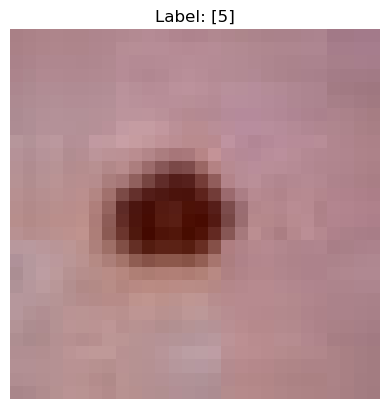

In [10]:
image, label = dataset_train[5]
print(f"Image shape: {image.shape}")

# Reshape and convert the image for display
image_display = image.permute(1, 2, 0).numpy()  # Change from (3, 28, 28) to (28, 28, 3)
image_display = (image_display * 0.1684) + 0.5719  # Denormalize the image
image_display = np.clip(image_display, 0, 1)  # Clip values to [0, 1] range

plt.imshow(image_display)
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

In [11]:
from cm2003.models import alexnet
from cm2003.train import train, check_accuracy


model = alexnet.AlexNet(num_classes=7, in_channels=3)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set number of epochs
num_epochs = 10


# Train the model
model, results = train(model, loader_train, loader_val, criterion, optimizer, device, num_epochs)

# Check accuracy on the test set
test_loss, test_accuracy = check_accuracy(model, loader_test, criterion, device)
train_loss, train_accuracy = check_accuracy(model, loader_train, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")



Epoch 1/10:
Train Loss: 1.0551
Val Loss: 0.9193, Val Accuracy: 0.6680
Epoch 2/10:
Train Loss: 0.9071
Val Loss: 0.8139, Val Accuracy: 0.6909
Epoch 3/10:
Train Loss: 0.8440
Val Loss: 0.7856, Val Accuracy: 0.7069
Epoch 4/10:
Train Loss: 0.8109
Val Loss: 0.7826, Val Accuracy: 0.7049
Epoch 5/10:
Train Loss: 0.7950
Val Loss: 0.7436, Val Accuracy: 0.7188
Epoch 6/10:
Train Loss: 0.7606
Val Loss: 0.7449, Val Accuracy: 0.7228
Epoch 7/10:
Train Loss: 0.7473
Val Loss: 0.7118, Val Accuracy: 0.7458
Epoch 8/10:
Train Loss: 0.7360
Val Loss: 0.6961, Val Accuracy: 0.7468
Epoch 9/10:
Train Loss: 0.7147
Val Loss: 0.7115, Val Accuracy: 0.7468
Epoch 10/10:
Train Loss: 0.7004
Val Loss: 0.7092, Val Accuracy: 0.7318
Test Loss: 0.7138, Test Accuracy: 0.7232
Train Loss: 0.6663, Train Accuracy: 0.7421
